# ESE 527 Project
## Data-Driven Analytics for Obesity Management and Business Strategy
### Team ZY
### Team members: Zhetan Zhang, Mingqi Yang

## 1. Data preprocessing

### Read and check data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [2]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


### One-hot encoding

In [3]:
df_object = df.select_dtypes(include=[object])
df_numerics = df.select_dtypes(include='number')

In [4]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
enc.fit(df_object)
encoded_df = pd.DataFrame(enc.transform(df_object).toarray(),columns=enc.get_feature_names_out())

In [5]:
new_df = pd.concat([df_numerics, encoded_df], axis=1, join="inner")
new_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Normalization

In [6]:
normalized_df = (new_df-new_df.min())/(new_df.max()-new_df.min())
normalized_df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad_Insufficient_Weight,NObeyesdad_Normal_Weight,NObeyesdad_Obesity_Type_I,NObeyesdad_Obesity_Type_II,NObeyesdad_Obesity_Type_III,NObeyesdad_Overweight_Level_I,NObeyesdad_Overweight_Level_II
0,0.148936,0.320755,0.186567,0.5,0.666667,0.500000,0.000000,0.500000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.148936,0.132075,0.126866,1.0,0.666667,1.000000,1.000000,0.000000,1.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.191489,0.660377,0.283582,0.5,0.666667,0.500000,0.666667,0.500000,0.0,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.276596,0.660377,0.358209,1.0,0.666667,0.500000,0.666667,0.000000,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.170213,0.622642,0.379104,0.5,0.000000,0.500000,0.000000,0.000000,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.364070,0.558756,0.453124,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.502565,0.447130,0.299635,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.527097,0.471403,0.323144,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.926170,0.379702,0.293017,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Visualization

Numerical data

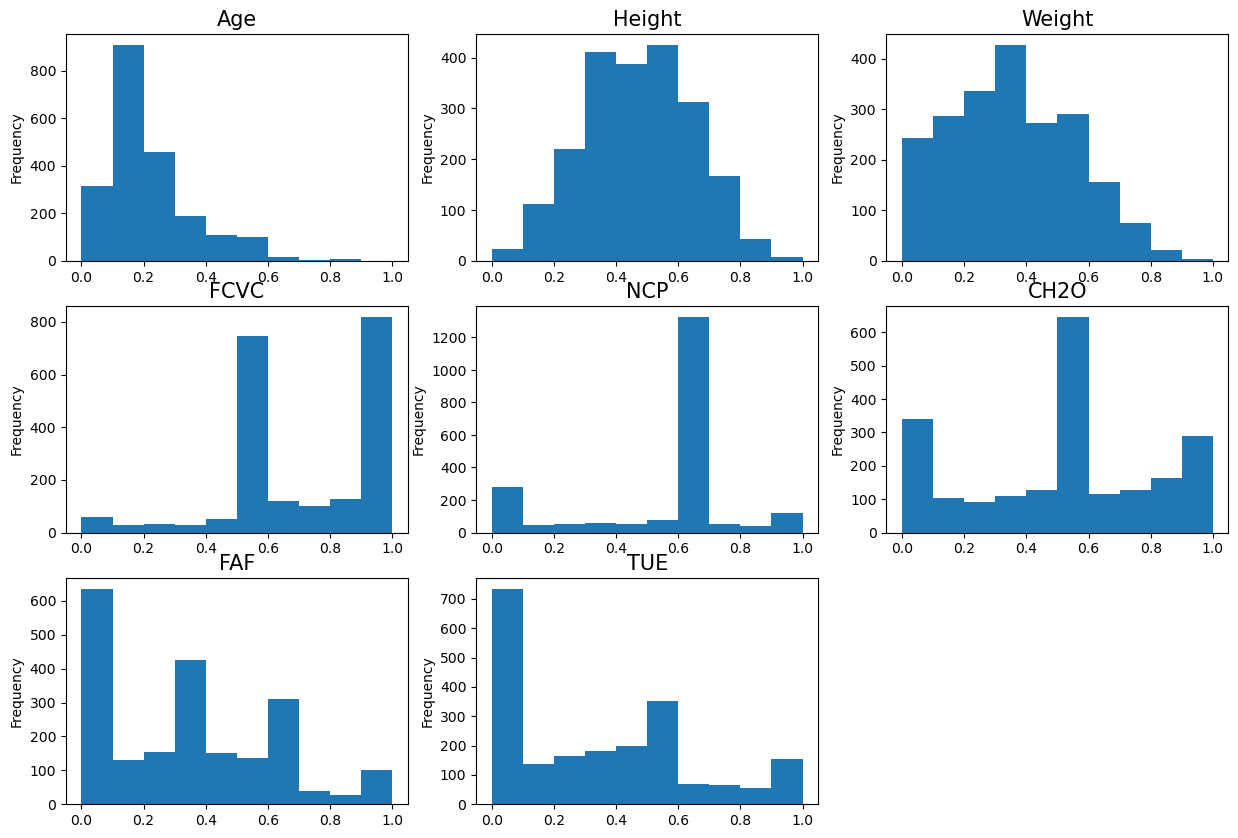

In [7]:
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
normalized_numeric = normalized_df.iloc[:,:8]
#create subplot
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
subplot_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8]
for i in range(8):
    normalized_numeric.iloc[:,i].plot(kind = 'hist',ax = subplot_list[i])
    subplot_list[i].set_title(normalized_numeric.columns[i],size = 15)
plt.draw()
plt.show()

<Axes: ylabel='Frequency'>

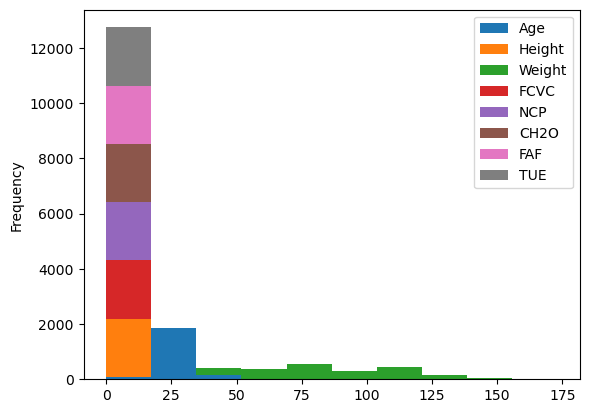

In [8]:
#original data distribution
df_numerics.plot.hist(stacked=True,bins = 10)

<Axes: ylabel='Frequency'>

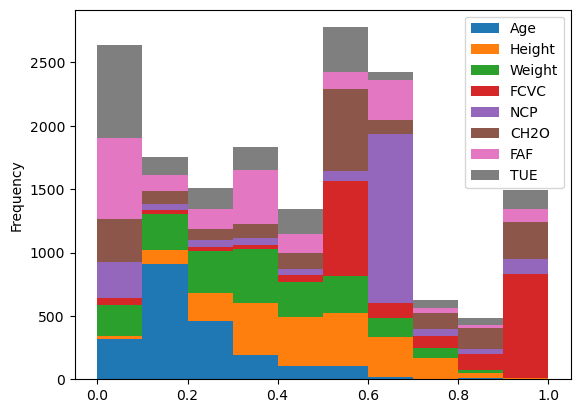

In [9]:
#normalized data distribution
normalized_df.iloc[:,0:8].plot.hist(stacked=True,bins = 10)

Correlation Heat map

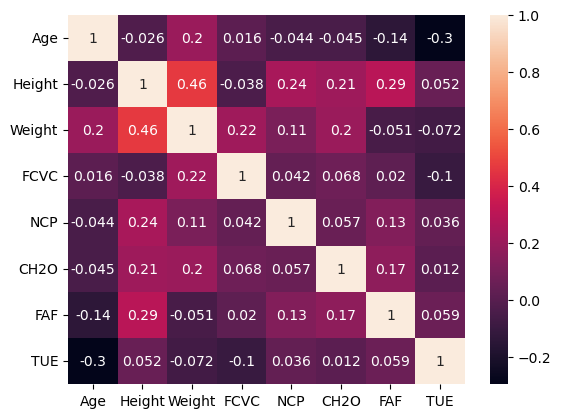

In [10]:
import seaborn as sns
sns.heatmap(normalized_df.iloc[:,0:8].corr(),annot = True);

Categorical data

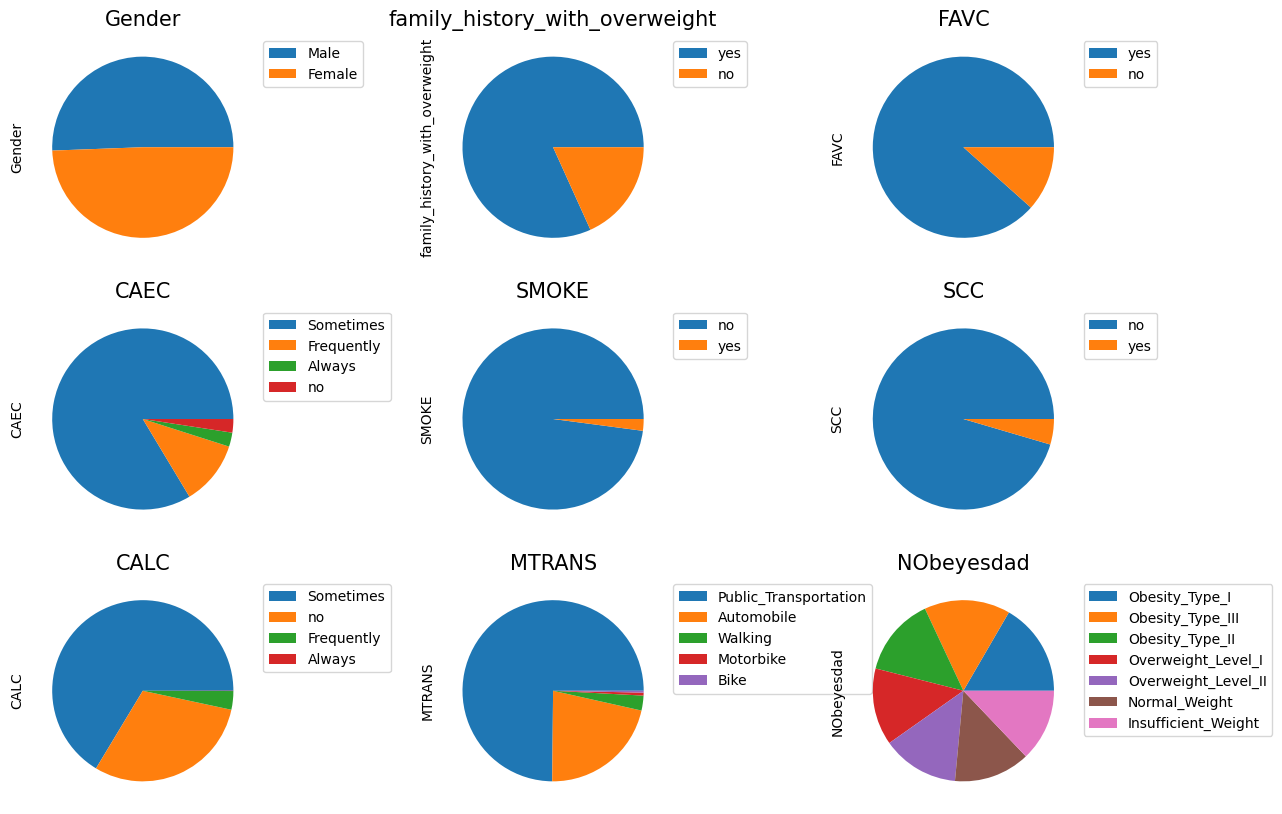

In [11]:
fig = plt.figure(1, figsize=(15, 10))
plt.clf()
#create subplot
gs = fig.add_gridspec(3,3)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])
ax7 = fig.add_subplot(gs[2, 0])
ax8 = fig.add_subplot(gs[2, 1])
ax9 = fig.add_subplot(gs[2, 2])
subplot_list = [ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9]
for i in range(9):
    df_object.iloc[:,i].value_counts().plot(kind='pie',ax = subplot_list[i],labeldistance=None)
    subplot_list[i].set_title(df_object.columns[i],size = 15)
    subplot_list[i].legend(loc = 'upper left',bbox_to_anchor=(1, 1))
plt.draw()
plt.show()

### Anomaly Detection

Numerical Data

In [12]:
df_numerics

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,21.000000,1.620000,64.000000,2.0,3.0,2.000000,0.000000,1.000000
1,21.000000,1.520000,56.000000,3.0,3.0,3.000000,3.000000,0.000000
2,23.000000,1.800000,77.000000,2.0,3.0,2.000000,2.000000,1.000000
3,27.000000,1.800000,87.000000,3.0,3.0,2.000000,2.000000,0.000000
4,22.000000,1.780000,89.800000,2.0,1.0,2.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...
2106,20.976842,1.710730,131.408528,3.0,3.0,1.728139,1.676269,0.906247
2107,21.982942,1.748584,133.742943,3.0,3.0,2.005130,1.341390,0.599270
2108,22.524036,1.752206,133.689352,3.0,3.0,2.054193,1.414209,0.646288
2109,24.361936,1.739450,133.346641,3.0,3.0,2.852339,1.139107,0.586035


Feature Age:
Number of normal data points: 2087
Number of anomalies: 24
Percentage of anomalies: 1.149976042165788% 



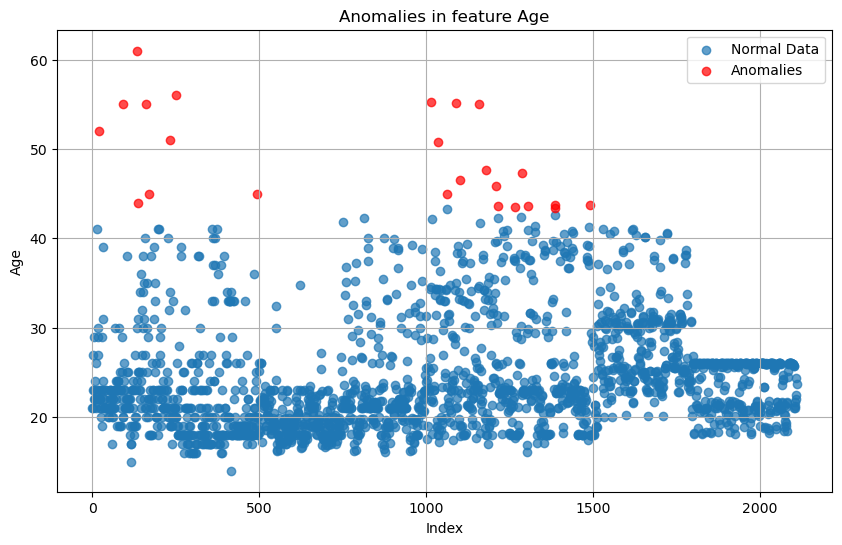

Feature Height:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



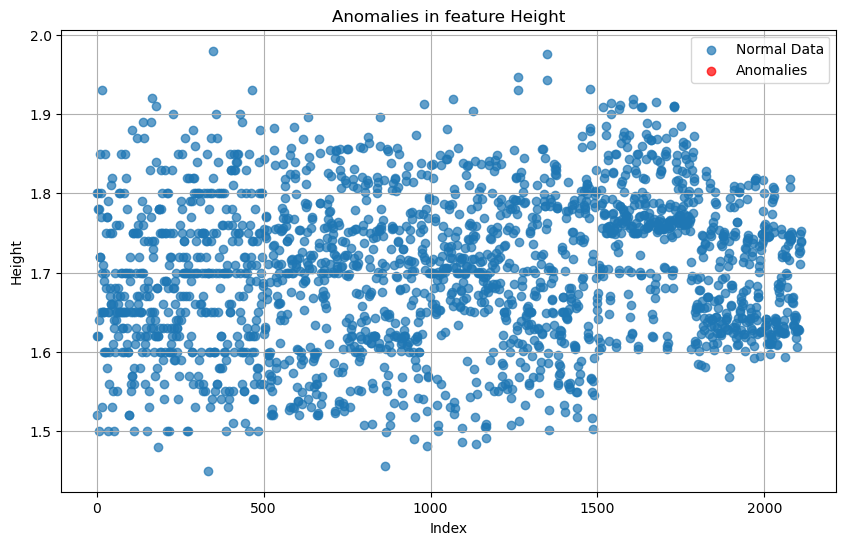

Feature Weight:
Number of normal data points: 2110
Number of anomalies: 1
Percentage of anomalies: 0.047393364928909956% 



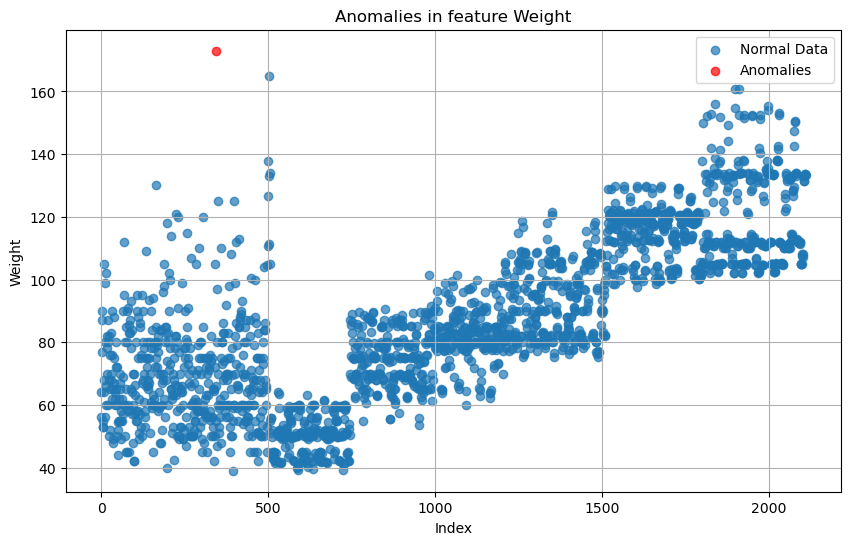

Feature FCVC:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



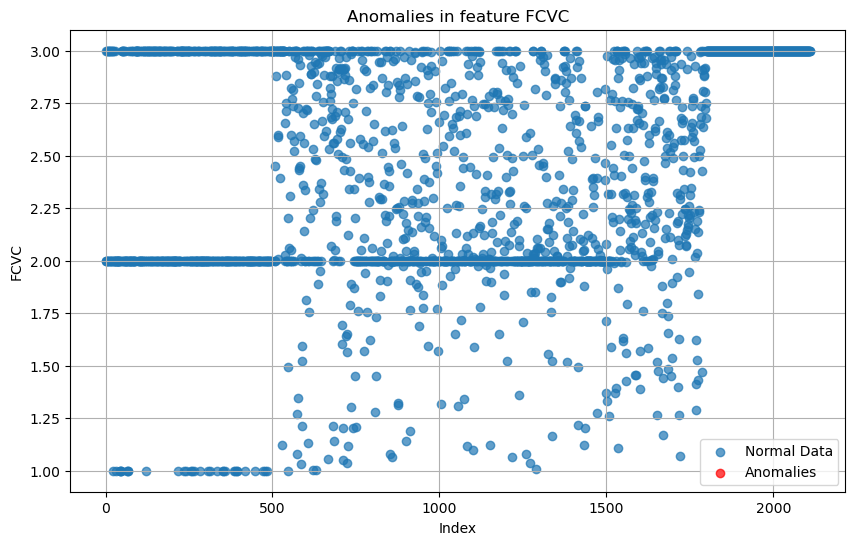

Feature NCP:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



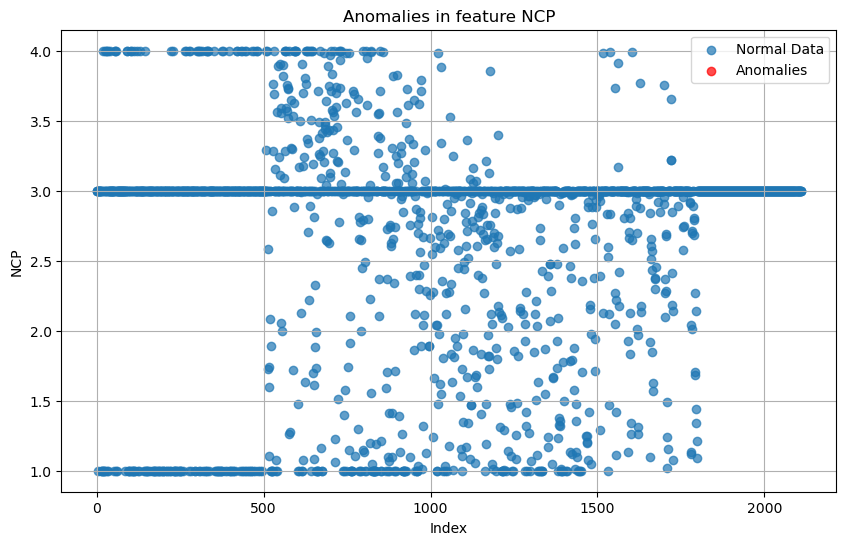

Feature CH2O:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



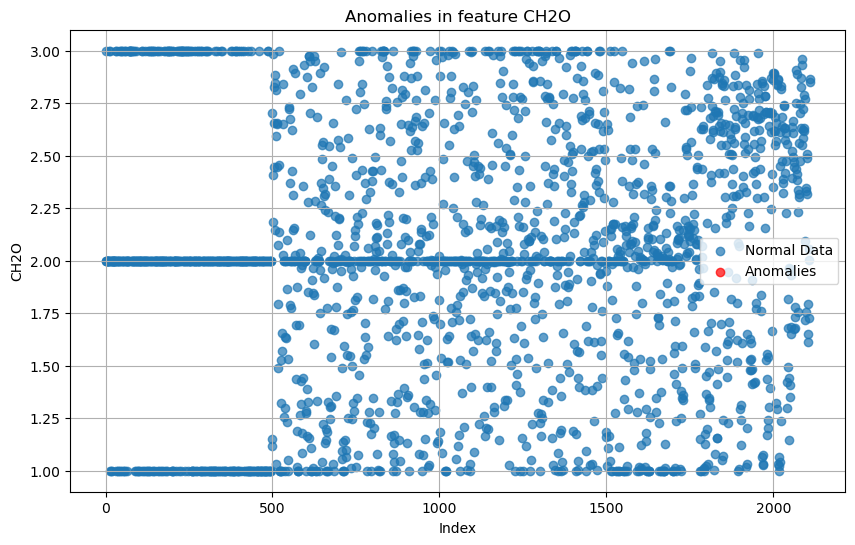

Feature FAF:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



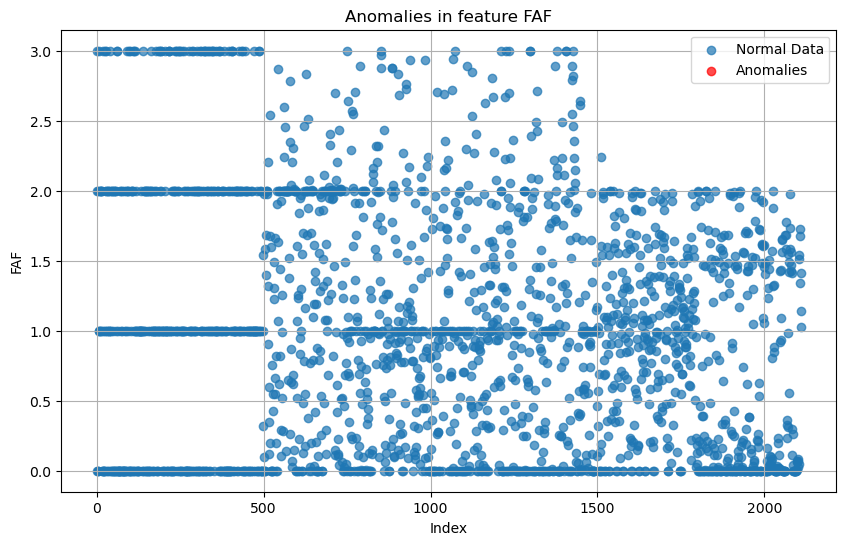

Feature TUE:
Number of normal data points: 2111
Number of anomalies: 0
Percentage of anomalies: 0.0% 



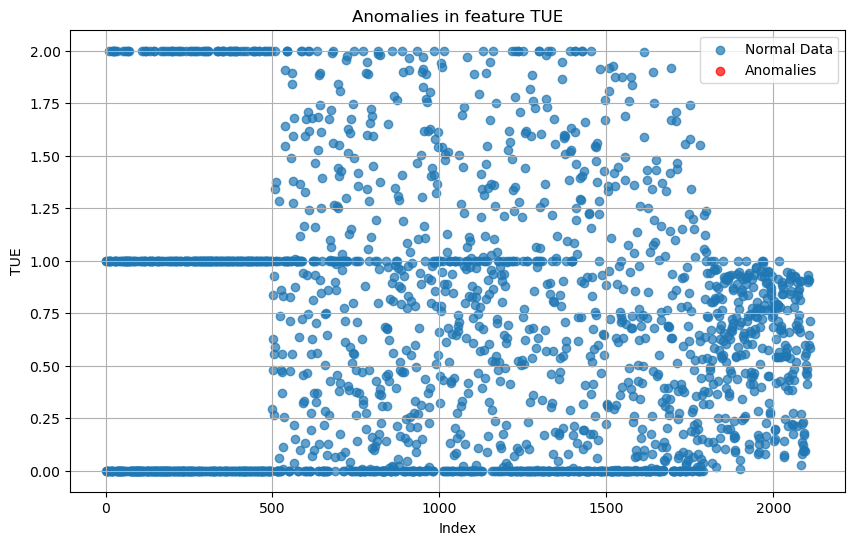

In [67]:
# Anomaly Detection using statistical approach
anomaly_sample = {}

for column in df_numerics.columns:
    mean_val = df_numerics[column].mean()
    std_val = df_numerics[column].std()
    
    # Define the boundaries between anomalies and normal values
    lower_bound = mean_val - 3 * std_val
    upper_bound = mean_val + 3 * std_val
    
    # Find anomalies for this column
    normal_data = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    anomalies = df_numerics[(df_numerics[column] < lower_bound) | (df_numerics[column] > upper_bound)]
    anomaly_sample[column] = anomalies
    
    # Print counts
    print(f"Feature {column}:")
    print(f"Number of normal data points: {len(normal_data)}")
    print(f"Number of anomalies: {len(anomalies)}")
    print(f"Percentage of anomalies: {len(anomalies)/len(normal_data) * 100}% \n")

    # Plot
    plt.figure(figsize=(10, 6))
    plt.scatter(normal_data.index, normal_data[column], label='Normal Data', alpha=0.7)
    plt.scatter(anomalies.index, anomalies[column], color='red', label='Anomalies', alpha=0.7)
    plt.title(f"Anomalies in feature {column}")
    plt.xlabel("Index")
    plt.ylabel(column)
    plt.legend()
    plt.grid(True)
    plt.show()

Categorical Data

In [14]:
df_object

,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight
1,Female,yes,no,Sometimes,yes,yes,Sometimes,Public_Transportation,Normal_Weight
2,Male,yes,no,Sometimes,no,no,Frequently,Public_Transportation,Normal_Weight
3,Male,no,no,Sometimes,no,no,Frequently,Walking,Overweight_Level_I
4,Male,no,no,Sometimes,no,no,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...
2106,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,yes,yes,Sometimes,no,no,Sometimes,Public_Transportation,Obesity_Type_III


In [15]:
# Anomaly detection using frequency-based detection
anomaly_sample = {}

for column in df_object.columns:
    feature_counts = df_object[column].value_counts()
    anomalies = feature_counts[feature_counts < 5]
    anomaly_sample[column] = anomalies

In [16]:
for feature, anomaly_data in anomaly_sample.items():
    print(f"Anomalies in {feature}:")
    print(anomaly_data, "\n")

Anomalies in Gender:
Series([], Name: Gender, dtype: int64) 

Anomalies in family_history_with_overweight:
Series([], Name: family_history_with_overweight, dtype: int64) 

Anomalies in FAVC:
Series([], Name: FAVC, dtype: int64) 

Anomalies in CAEC:
Series([], Name: CAEC, dtype: int64) 

Anomalies in SMOKE:
Series([], Name: SMOKE, dtype: int64) 

Anomalies in SCC:
Series([], Name: SCC, dtype: int64) 

Anomalies in CALC:
Always    1
Name: CALC, dtype: int64 

Anomalies in MTRANS:
Series([], Name: MTRANS, dtype: int64) 

Anomalies in NObeyesdad:
Series([], Name: NObeyesdad, dtype: int64) 



In [17]:
# Visualize this anomaly sample
anomaly_row = df[df['CALC'] == 'Always']
print(anomaly_row)

   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
26   Male  21.0     1.7    65.0                            yes  yes   2.0   

    NCP        CAEC SMOKE  CH2O SCC  FAF  TUE    CALC   MTRANS     NObeyesdad  
26  1.0  Frequently    no   2.0  no  1.0  2.0  Always  Walking  Normal_Weight  


In [18]:
anomaly_sample

{'Gender': Series([], Name: Gender, dtype: int64),
 'family_history_with_overweight': Series([], Name: family_history_with_overweight, dtype: int64),
 'FAVC': Series([], Name: FAVC, dtype: int64),
 'CAEC': Series([], Name: CAEC, dtype: int64),
 'SMOKE': Series([], Name: SMOKE, dtype: int64),
 'SCC': Series([], Name: SCC, dtype: int64),
 'CALC': Always    1
 Name: CALC, dtype: int64,
 'MTRANS': Series([], Name: MTRANS, dtype: int64),
 'NObeyesdad': Series([], Name: NObeyesdad, dtype: int64)}

LocalOutlierFactor

In [173]:
from sklearn.neighbors import LocalOutlierFactor
clf = LocalOutlierFactor()
LOF_df = normalized_df.copy()
LOF_df = LOF_df.iloc[:,:31]
LOF_df['NObeyesdad'] = df.iloc[:,-1]
LOF_df['outlier'] = clf.fit_predict(df_numerics)
LOF_df = LOF_df[LOF_df['outlier']==1]
LOF_df = LOF_df.iloc[:,:-1]

### Logistic regression

In [223]:
logistic_df = normalized_df.iloc[:,:31]
logistic_df['NObeyesdad'] = df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 0

Split training and testing data set

In [224]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

Apply logistic regression

In [225]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.cv_results_

{'mean_fit_time': array([0.01663008]),
 'std_fit_time': array([0.01131471]),
 'mean_score_time': array([0.00049195]),
 'std_score_time': array([0.00022771]),
 'params': [{}],
 'split0_test_score': array([0.95945946]),
 'split1_test_score': array([0.94256757]),
 'split2_test_score': array([0.92542373]),
 'split3_test_score': array([0.94915254]),
 'split4_test_score': array([0.93559322]),
 'mean_test_score': array([0.9424393]),
 'std_test_score': array([0.01158593]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.95427604]),
 'split1_train_score': array([0.9491956]),
 'split2_train_score': array([0.94923858]),
 'split3_train_score': array([0.94670051]),
 'split4_train_score': array([0.9500846]),
 'mean_train_score': array([0.94989906]),
 'std_train_score': array([0.00246391])}

In [227]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Evaluate the model

In [228]:
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9542586750788643
F1 score: 0.9689174705251876
Recall: 0.9720430107526882
Precision: 0.9658119658119658

 clasification report:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91       169
           1       0.97      0.97      0.97       465

    accuracy                           0.95       634
   macro avg       0.94      0.94      0.94       634
weighted avg       0.95      0.95      0.95       634


 confussion matrix:
 [[153  16]
 [ 13 452]]


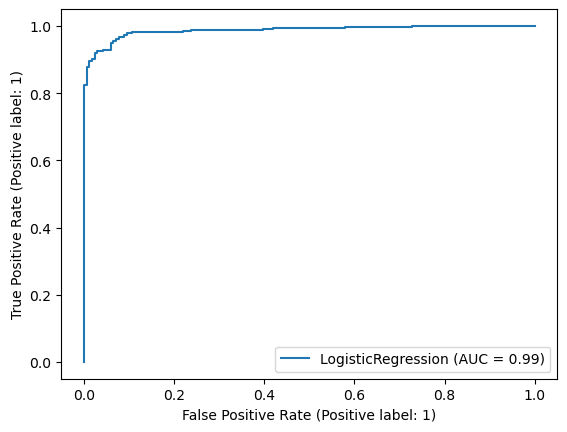

In [229]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)

Check weight of each feature

In [230]:
pd.DataFrame({'1':clf.coef_[0]},index = logistic_df.columns[:-1]).sort_values(by = ['1'],key = abs,ascending=False)

,1
Weight,11.638546
Age,2.771782
Height,-2.508798
CAEC_no,1.007944
CAEC_Frequently,-0.990376
CAEC_Always,-0.914366
CAEC_Sometimes,0.897178
FAF,-0.833509
MTRANS_Public_Transportation,0.794503
NCP,-0.682140


predict without age, weight, height

In [231]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,3:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,3:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.cv_results_

{'mean_fit_time': array([0.02276535]),
 'std_fit_time': array([0.02676875]),
 'mean_score_time': array([0.00042758]),
 'std_score_time': array([0.00023294]),
 'params': [{}],
 'split0_test_score': array([0.87837838]),
 'split1_test_score': array([0.84797297]),
 'split2_test_score': array([0.85423729]),
 'split3_test_score': array([0.85762712]),
 'split4_test_score': array([0.8440678]),
 'mean_test_score': array([0.85645671]),
 'std_test_score': array([0.01193578]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.85520745]),
 'split1_train_score': array([0.86113463]),
 'split2_train_score': array([0.86463621]),
 'split3_train_score': array([0.85279188]),
 'split4_train_score': array([0.86379019]),
 'mean_train_score': array([0.85951207]),
 'std_train_score': array([0.00470919])}

In [232]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8580441640378549
F1 score: 0.9050632911392404
Recall: 0.9225806451612903
Precision: 0.8881987577639752

 clasification report:
               precision    recall  f1-score   support

           0       0.76      0.68      0.72       169
           1       0.89      0.92      0.91       465

    accuracy                           0.86       634
   macro avg       0.82      0.80      0.81       634
weighted avg       0.85      0.86      0.86       634


 confussion matrix:
 [[115  54]
 [ 36 429]]


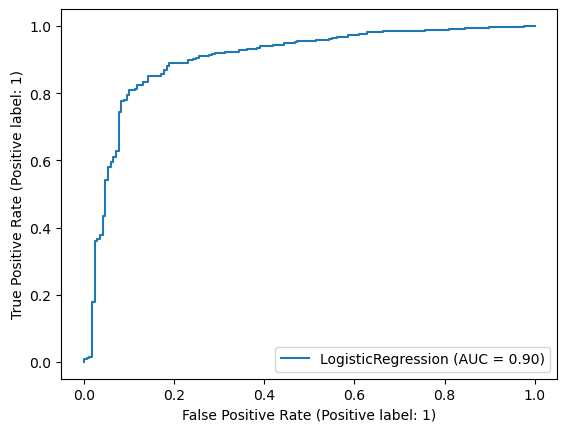

In [233]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(clf, x_test, y_test)

Use dataframe after LOF

In [234]:
logistic_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    logistic_df.loc[logistic_df['NObeyesdad'] == a,'NObeyesdad'] = 0
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(logistic_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
param_grid = dict()
grid = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid.cv_results_

{'mean_fit_time': array([0.01718669]),
 'std_fit_time': array([0.01256439]),
 'mean_score_time': array([0.00035377]),
 'std_score_time': array([0.00014561]),
 'params': [{}],
 'split0_test_score': array([0.93617021]),
 'split1_test_score': array([0.93617021]),
 'split2_test_score': array([0.94661922]),
 'split3_test_score': array([0.93594306]),
 'split4_test_score': array([0.96797153]),
 'mean_test_score': array([0.94457485]),
 'std_test_score': array([0.01238844]),
 'rank_test_score': array([1], dtype=int32),
 'split0_train_score': array([0.94844444]),
 'split1_train_score': array([0.95022222]),
 'split2_train_score': array([0.95293073]),
 'split3_train_score': array([0.95293073]),
 'split4_train_score': array([0.94849023]),
 'mean_train_score': array([0.95060367]),
 'std_train_score': array([0.00200523])}

In [235]:
clf = LogisticRegression()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score

print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.945364238410596
F1 score: 0.96353591160221
Recall: 0.9819819819819819
Precision: 0.9457700650759219

 clasification report:
               precision    recall  f1-score   support

           0       0.94      0.84      0.89       160
           1       0.95      0.98      0.96       444

    accuracy                           0.95       604
   macro avg       0.94      0.91      0.93       604
weighted avg       0.95      0.95      0.94       604


 confussion matrix:
 [[135  25]
 [  8 436]]


### KNN

Ordinal Encoding for obesity type

1:'Overweight_Level_I',

2:'Overweight_Level_II',

3:'Obesity_Type_I',

4:'Obesity_Type_II',

5:'Obesity_Type_III'

6:'Normal_Weight'

7:'Insufficient_Weight'

In [236]:
knn_df = normalized_df.iloc[:,:31]
knn_df['NObeyesdad'] = df.iloc[:,-1]
obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

Split training and testing data set

In [185]:
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")

Apply knn

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1,6))
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.79077645 0.75963582 0.76098946 0.7488044  0.75218965]


In [187]:
grid.cv_results_

{'mean_fit_time': array([0.00057311, 0.00031919, 0.00028095, 0.00021019, 0.00030322]),
 'std_fit_time': array([1.48912084e-04, 4.47811787e-05, 1.15832138e-04, 8.96479221e-06,
        1.27045599e-04]),
 'mean_score_time': array([0.00338883, 0.00248866, 0.00201221, 0.00190744, 0.00223122]),
 'std_score_time': array([0.00156944, 0.00051558, 0.00031696, 0.00014312, 0.00031544]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'split0_test_score': array([0.80743243, 0.77364865, 0.77027027, 0.75675676, 0.75337838]),
 'split1_test_score': array([0.7972973 , 0.76351351, 0.77027027, 0.75675676, 0.76689189]),
 'split2_test_score': array([0.76271186, 0.73898305, 0.73559322, 0.71186441, 0.72542373]),
 'split3_test_score': array([0.79661017, 0.76610169, 0.76610169

In [188]:
grid.best_params_

{'n_neighbors': 1}

In [189]:
clf = KNeighborsClassifier(n_neighbors=2)
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)

Model evaluation

In [190]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.7870662460567823
F1 score: 0.7805979049752149
Recall: 0.7831841848685303
Precision: 0.7884924177220066

 clasification report:
               precision    recall  f1-score   support

           1       0.62      0.78      0.69        89
           2       0.66      0.84      0.74        85
           3       0.86      0.75      0.80       114
           4       0.92      0.94      0.93        85
           5       0.99      0.98      0.98        92
           6       0.59      0.47      0.52        77
           7       0.88      0.74      0.80        92

    accuracy                           0.79       634
   macro avg       0.79      0.78      0.78       634
weighted avg       0.80      0.79      0.79       634


 confussion matrix:
 [[69  7  3  2  0  8  0]
 [11 71  1  0  1  1  0]
 [ 8 14 85  1  0  4  2]
 [ 2  2  1 80  0  0  0]
 [ 0  2  0  0 90  0  0]
 [14 11  7  2  0 36  7]
 [ 7  1  2  2  0 12 68]]


Redo with classified to obesity and nonobesity

In [191]:
knn_df = normalized_df.iloc[:,:31]
knn_df['NObeyesdad'] = df.iloc[:,-1]
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.90927393 0.89167201 0.90183005 0.90046954 0.89506184]


In [192]:
grid.cv_results_

{'mean_fit_time': array([0.00021958, 0.0002234 , 0.00027599, 0.00027356, 0.00026932]),
 'std_fit_time': array([2.43686649e-05, 3.02000213e-05, 1.45292102e-04, 1.36859957e-04,
        1.11479449e-04]),
 'mean_score_time': array([0.0023097 , 0.00191593, 0.00239019, 0.00253754, 0.00239286]),
 'std_score_time': array([0.00023489, 0.00015288, 0.00043932, 0.00044929, 0.00060407]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'split0_test_score': array([0.92905405, 0.91216216, 0.92905405, 0.93243243, 0.90878378]),
 'split1_test_score': array([0.89189189, 0.87162162, 0.87162162, 0.875     , 0.875     ]),
 'split2_test_score': array([0.89830508, 0.88474576, 0.89152542, 0.87457627, 0.86440678]),
 'split3_test_score': array([0.91525424, 0.89491525, 0.91186441

In [193]:
grid.best_params_

{'n_neighbors': 1}

In [194]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'micro'))
print('Recall:', recall_score(y_test, y_pred,average = 'micro'))
print('Precision:', precision_score(y_test, y_pred,average = 'micro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9242902208201893
F1 score: 0.9242902208201893
Recall: 0.9242902208201893
Precision: 0.9242902208201893

 clasification report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       169
           1       0.95      0.95      0.95       465

    accuracy                           0.92       634
   macro avg       0.90      0.90      0.90       634
weighted avg       0.92      0.92      0.92       634


 confussion matrix:
 [[145  24]
 [ 24 441]]


Use dataframe after LOF

In [209]:
knn_df = LOF_df.copy()

obesity_type = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III'
               ,'Normal_Weight','Insufficient_Weight']
for i in range(len(obesity_type)):
    knn_df.loc[knn_df['NObeyesdad'] == obesity_type[i],'NObeyesdad'] = i+1

train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=range(1,6))
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.79246612 0.76403422 0.75835542 0.75977891 0.75550339]


In [210]:
grid.cv_results_

{'mean_fit_time': array([0.00047202, 0.00027547, 0.00039854, 0.00025787, 0.0003212 ]),
 'std_fit_time': array([2.50895990e-04, 4.10915234e-05, 1.59132827e-04, 1.09804903e-04,
        1.44704672e-04]),
 'mean_score_time': array([0.0025763 , 0.00217991, 0.00207644, 0.00192976, 0.00215673]),
 'std_score_time': array([0.00049081, 0.00020147, 0.00058341, 0.00018108, 0.00066781]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4, 5],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4},
  {'n_neighbors': 5}],
 'split0_test_score': array([0.79787234, 0.79432624, 0.75177305, 0.75886525, 0.75531915]),
 'split1_test_score': array([0.78723404, 0.73758865, 0.75886525, 0.75177305, 0.76241135]),
 'split2_test_score': array([0.78291815, 0.77580071, 0.76156584, 0.74733096, 0.77580071]),
 'split3_test_score': array([0.79715302, 0.74733096, 0.74021352

In [211]:
grid.best_params_

{'n_neighbors': 1}

In [213]:
clf = KNeighborsClassifier(n_neighbors=1)
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.8162251655629139
F1 score: 0.8035116189598093
Recall: 0.8071648884289305
Precision: 0.8043031549025633

 clasification report:
               precision    recall  f1-score   support

           1       0.74      0.71      0.72        76
           2       0.69      0.79      0.74        77
           3       0.81      0.82      0.82       100
           4       0.91      0.94      0.92        93
           5       0.99      1.00      0.99        98
           6       0.68      0.52      0.59        81
           7       0.81      0.87      0.84        79

    accuracy                           0.82       604
   macro avg       0.80      0.81      0.80       604
weighted avg       0.81      0.82      0.81       604


 confussion matrix:
 [[54  7  5  0  0  7  3]
 [ 9 61  3  1  1  1  1]
 [ 0  8 82  5  0  4  1]
 [ 0  2  4 87  0  0  0]
 [ 0  0  0  0 98  0  0]
 [10 10  5  3  0 42 11]
 [ 0  0  2  0  0  8 69]]


In [199]:
knn_df = LOF_df.copy()
obesity = ['Overweight_Level_I','Overweight_Level_II','Obesity_Type_I','Obesity_Type_II','Obesity_Type_III']
nobesity = ['Normal_Weight','Insufficient_Weight']
for a in obesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 1
for a in nobesity:
    knn_df.loc[knn_df['NObeyesdad'] == a,'NObeyesdad'] = 0
train_df, test_df = train_test_split(knn_df, train_size=0.7,random_state = 1)
x_train = train_df.iloc[:,:-1]
y_train = train_df.iloc[:,-1]
y_train = y_train.astype("int")
x_test = test_df.iloc[:,:-1]
y_test = test_df.iloc[:,-1]
y_test = y_test.astype("int")
from sklearn.neighbors import KNeighborsClassifier
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(x_train.values, y_train.values)
grid_mean_scores = grid.cv_results_['mean_test_score']
print(grid_mean_scores)

[0.9047702  0.90264254 0.90690038 0.90832134]


In [200]:
grid.cv_results_

{'mean_fit_time': array([0.00031886, 0.00023546, 0.00025063, 0.00024776]),
 'std_fit_time': array([1.32949143e-04, 4.72599752e-05, 9.23410146e-05, 1.04976261e-04]),
 'mean_score_time': array([0.00216951, 0.00197954, 0.00232472, 0.00233221]),
 'std_score_time': array([0.00018889, 0.0003862 , 0.00045058, 0.0004202 ]),
 'param_n_neighbors': masked_array(data=[1, 2, 3, 4],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 1},
  {'n_neighbors': 2},
  {'n_neighbors': 3},
  {'n_neighbors': 4}],
 'split0_test_score': array([0.90780142, 0.90425532, 0.90780142, 0.90070922]),
 'split1_test_score': array([0.89007092, 0.88297872, 0.89716312, 0.90780142]),
 'split2_test_score': array([0.90035587, 0.886121  , 0.88967972, 0.88967972]),
 'split3_test_score': array([0.90035587, 0.90747331, 0.90391459, 0.91459075]),
 'split4_test_score': array([0.9252669 , 0.93238434, 0.93594306, 0.92882562]),
 'mean_test_score': array([0.9047

In [201]:
grid.best_params_

{'n_neighbors': 4}

In [237]:
clf = KNeighborsClassifier(n_neighbors=4)
clf.fit(x_train.values, y_train.values)
y_pred = clf.predict(x_test.values)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred,average = 'macro'))
print('Recall:', recall_score(y_test, y_pred,average = 'macro'))
print('Precision:', precision_score(y_test, y_pred,average = 'macro'))
print('\n clasification report:\n', classification_report(y_test,y_pred))
print('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.9188741721854304
F1 score: 0.8952157395900824
Recall: 0.8928490990990992
Precision: 0.8976688183074709

 clasification report:
               precision    recall  f1-score   support

           0       0.85      0.84      0.85       160
           1       0.94      0.95      0.95       444

    accuracy                           0.92       604
   macro avg       0.90      0.89      0.90       604
weighted avg       0.92      0.92      0.92       604


 confussion matrix:
 [[134  26]
 [ 23 421]]
